In [96]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
#trajectory3: delta = .40
#trajectory1: delta = .05 
#trajectory2: delta= .05, tau=5
traj = np.load('trajs/trajectory_Ldist_tau500_phi01_eps01') # trajectory_Ldist_tau500_phi01_eps01
delta=5
tau=500

In [5]:
S[-2,:]

array([ 0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,
        0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,
        0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,
        0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,
        0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,
        0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,
        0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,
        0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,
        0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,
        0.9])

In [98]:
N=100
S = np.zeros(shape=(len(traj.index), N))
K = np.zeros(shape=(len(traj.index), N))
C = np.zeros(shape=(len(traj.index), N))
W = np.zeros(shape=(len(traj.index), N))
L = traj['P'][0]

for a, t in enumerate(traj.index):
    S[a,:] = traj['s'][t]
    C[a,:] = traj['C'][t]
    K[a,:] = traj['capital'][t]
    W[a,:] = traj['wage'][t]
        


0 10000


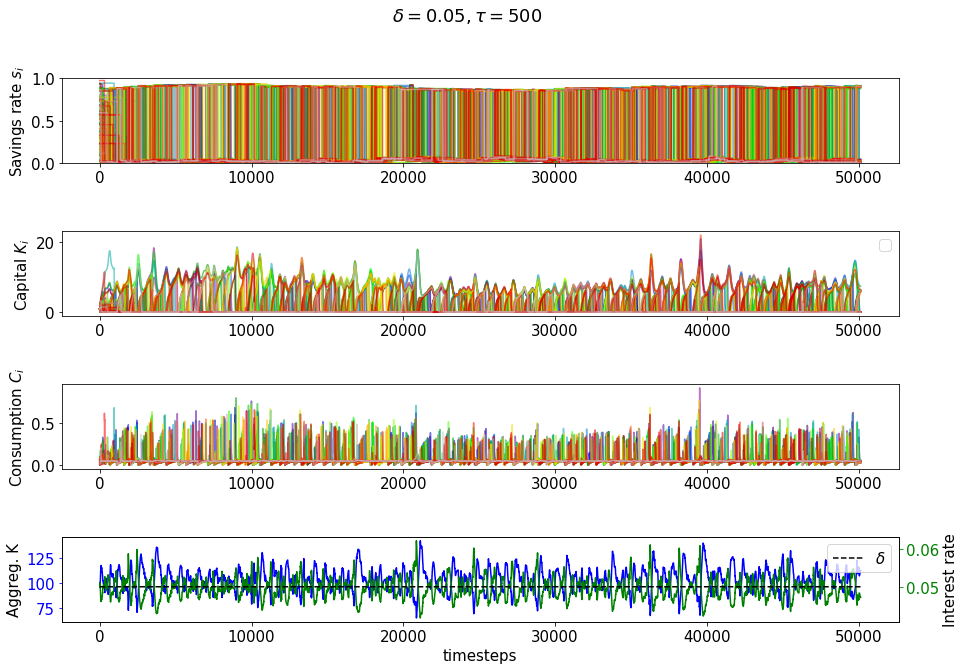

In [99]:
# plot all individual dynamics
plt.rc('font', size=15)  
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,figsize=(15,10))

plt.suptitle(r'$\delta=%s, \tau=%s$'%(np.round(delta/100.,2),tau))
start, stop = 0,10000#len(traj['r']) # 10000
print start, stop
Lim=0.05

kidotzero = W[start:stop,:]/(((delta/100. )/S[start:stop,:]) -traj['r'].values[start:stop][:,None])
kidotzero/=N
kidotzero_low = kidotzero*(kidotzero<Lim)
kidotzero_high = kidotzero*(kidotzero>=Lim)
fig.subplots_adjust(hspace = .8, wspace=.01);



for a,i in enumerate(range(N)):
    ax1.plot(traj.index[start:stop],S[start:stop,i], 
             c=plt.cm.spectral(float(a+1) / N), alpha=0.55);
    ax1.set_ylabel(r'Savings rate $s_i$')
    ax2.plot(traj.index[start:stop],K[start:stop,i], 
             c=plt.cm.spectral(float(a+1) / N),alpha=0.55);
    ax2.set_ylabel(r'Capital $K_i$')
    ax3.plot(traj.index[start:stop],C[start:stop,i], 
             c=plt.cm.spectral(float(a+1) / N),alpha=0.55);
    ax3.set_ylabel(r'Consumption $C_i$')
ax1.legend()
ax1.set_ylim((0,1))
ax3.legend()
# ax2.plot(np.array(traj.index[start:stop])[np.nonzero(kidotzero_high)[0]],
#     kidotzero_high[np.nonzero(kidotzero_high)],
#     'k',lw=3,label=r'$\dot{K}_i=0$');
# ax2.plot(np.array(traj.index[start:stop])[np.nonzero(kidotzero_low)[0]],
#     kidotzero_low[np.nonzero(kidotzero_low)],
#     'k',lw=3,label=r'$\dot{K}_i=0$');

from collections import OrderedDict
handles, labels = ax2.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax2.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=2)
#ax2.set_yscale('log')
#ax3.set_yscale('log')

#ax2.set_ylim(0,9)


ax4.plot(traj.index[start:stop],K[start:stop,:].sum(1),c='b');
ax4.set_ylabel('Aggreg. K')

ax5 = ax4.twinx();
ax5.plot(traj.index[start:stop],traj['r'].values[start:stop],c='g');
ax5.plot(traj.index[start:stop],delta/100. +0*traj.index[start:stop],
         'k--',label=r'$\delta$');

ax5.legend(loc='upper right')
ax5.set_ylabel('Interest rate')
ax5.tick_params(axis='y', colors='g')
ax4.tick_params(axis='y', colors='b')
ax4.set_xlabel('timesteps')
fig.savefig('delta_%s_start%s_stop%s_eps01_phi01.pdf'%(delta,start,stop))


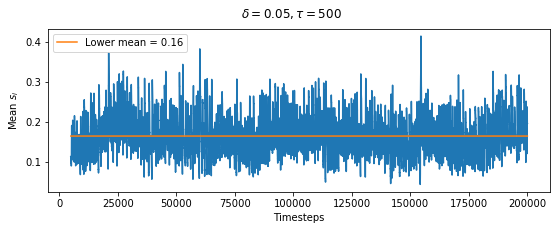

In [67]:
fig, ax = plt.subplots(figsize=(9,3))
plt.suptitle(r'$\delta=%s, \tau=%s$'%(np.round(delta/100.,2),tau))
start, stop = 1000, len(traj.index)
#ax.plot(traj.index[start:stop], S[start:stop].mean(1))

#ax.plot(traj.index[start:stop],traj.index[start:stop]*0 + np.mean(S[start:stop].mean(1)),
#       label = 'Mean = %s'%np.round(np.mean(S[start:stop].mean(1)),2))
y = (S[start:stop,:]* (S[start:stop,:] < 5)).sum(1) /(S[start:stop,:] < 5).sum(1)
ax.plot(traj.index[start:stop], y)#
ax.plot(traj.index[start:stop],traj.index[start:stop]*0 + np.mean(y),
       label = 'Lower mean = %s'%np.round(np.mean(y),2))


ax.legend()
ax.set_ylabel(r'Mean $s_i$')
ax.set_xlabel('Timesteps')
#fig.savefig('trajectory_Ldist_tau500_phi01_eps01_d50_si_lower.pdf')

0 10000


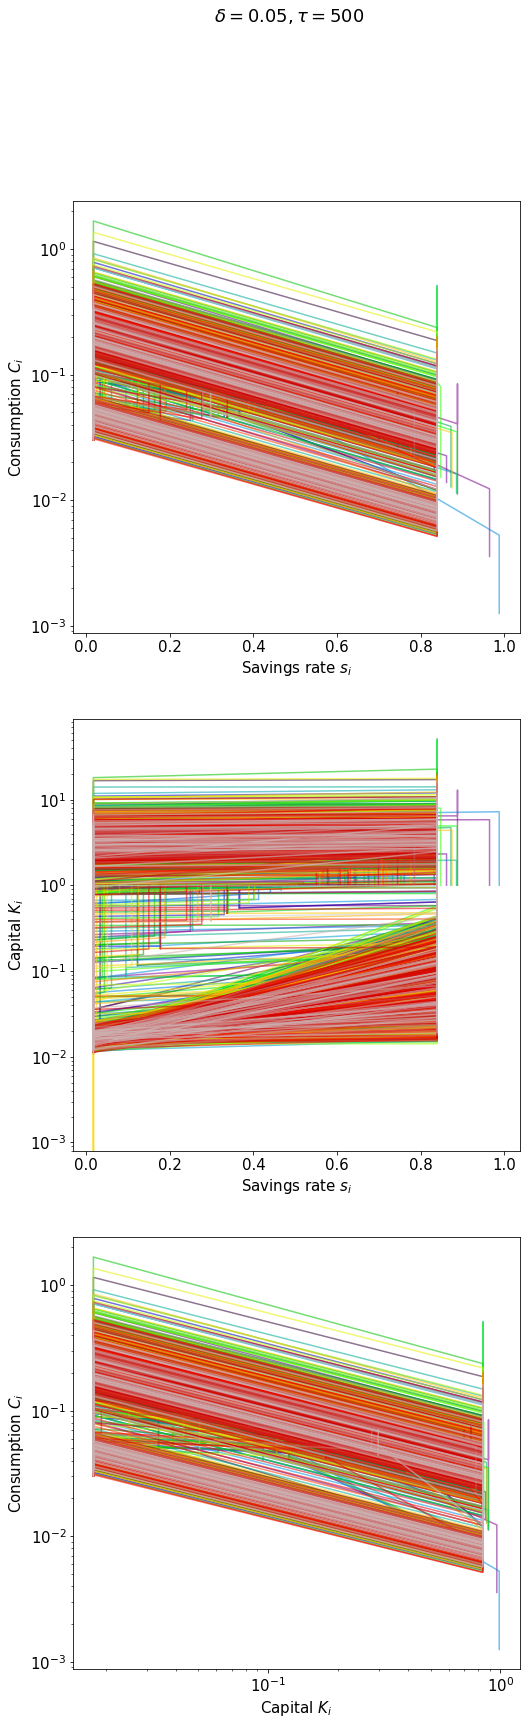

In [5]:
# phaseplots of all individual dynamics
plt.rc('font', size=15)  
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(8,27))
#fig.subplots_adjust(wspace=1.2);


plt.suptitle(r'$\delta=%s, \tau=%s$'%(np.round(delta/100.,2),tau))
start, stop = 0,10000 # 1000,3000 # len(traj.index) - 250,len(traj.index) 
print start, stop
kidotzero = W[start:stop,:]/(((delta/100. )/S[start:stop,:]) -traj['r'].values[start:stop][:,None])
kidotzero/=N
kidotzero_low = kidotzero*(kidotzero<L)
kidotzero_high = kidotzero*(kidotzero>=L)

L=0.05


for a,i in enumerate(range(N)):
    ax1.plot(S[start:stop,i], C[start:stop,i],
             c=plt.cm.spectral(float(a+1) / N), alpha=0.55);
    ax1.set_ylabel(r'Consumption $C_i$')
    ax1.set_xlabel(r'Savings rate $s_i$')

    ax2.plot( S[start:stop,i],K[start:stop,i],
             c=plt.cm.spectral(float(a+1) / N),alpha=0.55);
    ax2.set_xlabel(r'Savings rate $s_i$')
    ax2.set_ylabel(r'Capital $K_i$')

    ax3.loglog(S[start:stop,i], C[start:stop,i],
             c=plt.cm.spectral(float(a+1) / N), alpha=0.55);
    ax3.set_ylabel(r'Consumption $C_i$')
    ax3.set_xlabel(r'Capital $K_i$')
ax1.set_yscale('log')
# ax2.plot(np.array(traj.index[start:stop])[np.nonzero(kidotzero_high)[0]],
#     kidotzero_high[np.nonzero(kidotzero_high)],
#     'kx',lw=3,label=r'$\dot{K}_i=0$');
# ax2.plot(np.array(traj.index[start:stop])[np.nonzero(kidotzero_low)[0]],
#     kidotzero_low[np.nonzero(kidotzero_low)],
#     'kx',lw=3,label=r'$\dot{K}_i=0$');
ax2.set_yscale('log')
# #ax1.plot(traj.index[start:stop],S[start:stop,:].mean(1),label='mean');
# #ax1.legend();
# #ax1.plot(traj.index[start:stop],S[start:stop,:].mean(1),label='mean');

# from collections import OrderedDict
# handles, labels = ax2.get_legend_handles_labels()
# by_label = OrderedDict(zip(labels, handles))
# ax2.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=2)
# #ax2.set_yscale('log')
# ax2.set_ylim(0,9)

#fig.savefig('delta_%s_start%s_stop%s_phases.pdf'%(delta,start,stop))


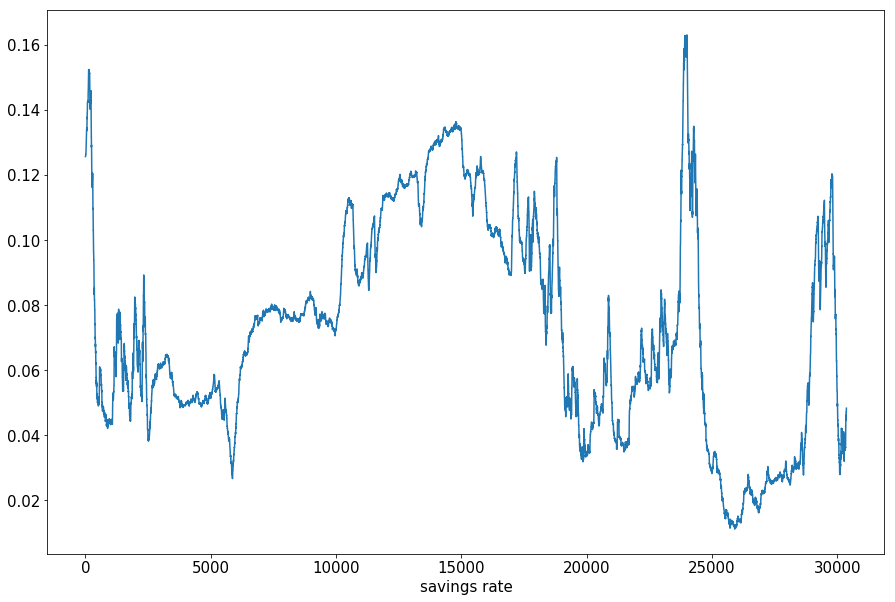

In [59]:
plt.rc('font', size=15)  

fig2=plt.figure(figsize=(15,10))
ax=fig2.add_subplot(111)

start,stop =10000, len(traj['Y'].values)
#ax.plot(traj['r'].values[start:stop], traj['Y'].values[start:stop], alpha=0.8)
ax.plot((S[start:stop,:]* (S[start:stop,:] < 0.5)).sum(1) /(S[start:stop,:] < 0.5).sum(1),
        (C[start:stop,:]* (S[start:stop,:] < 0.5)).sum(1) /(S[start:stop,:] < 0.5).sum(1),alpha=0.5)

#ax.plot((S[start:stop,:]* (S[start:stop,:] > 0.5)).sum(1) /(S[start:stop,:] > 0.5).sum(1) ,
#        (C[start:stop,:]* (S[start:stop,:] > 0.5)).sum(1) /(S[start:stop,:] > 0.5).sum(1),alpha=0.5)
#ax.plot((K[start:stop,:]*S[start:stop,:]).sum(1)/K[start:stop,:].sum(1), traj.Y.values[start:stop],'k',alpha=0.7)
#ax2=ax.twinx()

#ax.set_ylabel(r'Aggreg. capital K')
ax.legend()
ax.set_xlabel('savings rate')
#fig2.savefig('C_vs_t_traj1.pdf')

#ax.plot(traj['Y'].values)
#ax.plot(traj['Y'].values[1:] - np.power(K[:,:].sum(1)[1:],0.5))

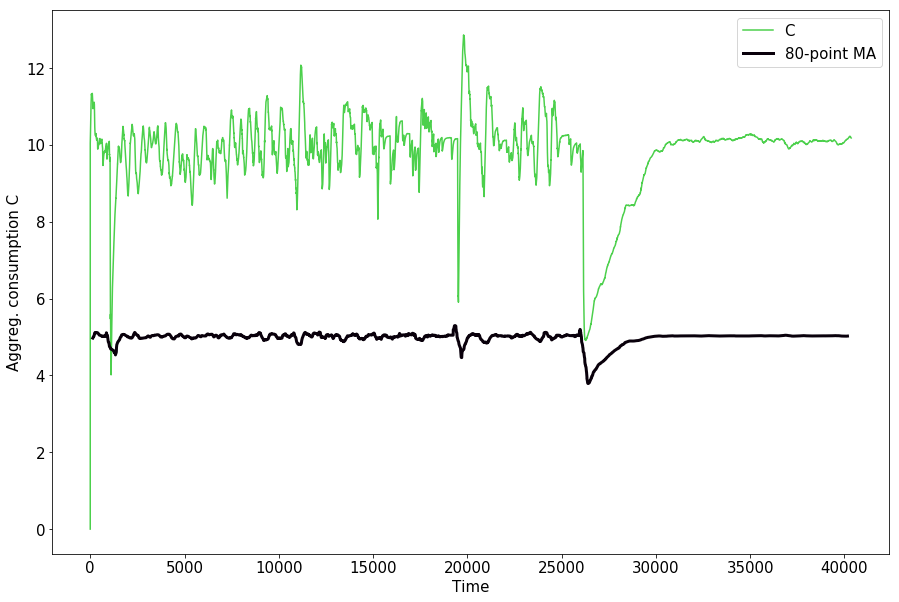

In [73]:
plt.rc('font', size=15)  

fig2=plt.figure(figsize=(15,10))
ax=fig2.add_subplot(111)

start,stop = 0, 8000#len(traj['Y'].values)
ax.plot(traj.index[start:stop], C[start:stop,:].sum(1),c=plt.cm.spectral(2/4.),alpha=0.7,label=r'C')
MA=80
mov = np.convolve(C[start:stop,:].sum(1), np.ones((MA,))/MA,mode='valid')
ax.plot(traj.index[start+MA/2:stop-MA/2+1],mov, c=plt.cm.spectral(1),lw=3,label=r'%s-point MA'%MA)
ax.set_ylabel(r'Aggreg. consumption C')
ax.legend()
ax.set_xlabel('Time')
#fig2.savefig('C_vs_t_traj1.pdf')

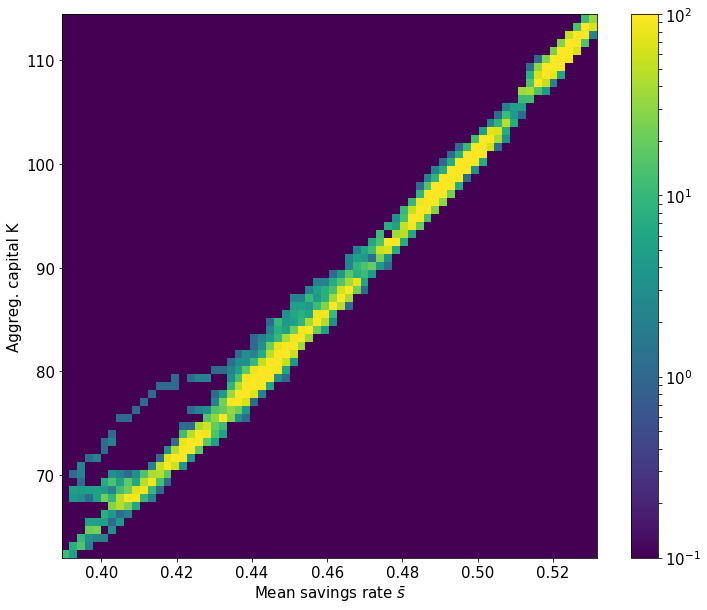

In [69]:
from matplotlib import colors # Phase-heatmaps of MAKRO Variables
fig=plt.figure(figsize=(12,10))
ax=fig.add_subplot(111)
start,stop = 10000, len(traj['Y'].values)
#ax.plot(S[start:stop,:].mean(1), traj['Y'].values[start:stop], alpha=0.8)
#ax.plot((K[start:stop,:]*S[start:stop,:]).sum(1)/K[start:stop,:].sum(1),
#        traj['Y'].values[start:stop])
if True:
    heatmap, xedges, yedges = np.histogram2d(S[start:stop,:].mean(1), 
                                                K[start:stop,:].sum(1), 
                                                bins=[68,68])
    heatmap+= 0.1
    c = ax.pcolormesh(xedges, yedges, heatmap.T,norm=colors.LogNorm(vmin=heatmap.min(), vmax=100))
    plt.colorbar(c)
    ax.set_ylabel('Aggreg. capital K')
    ax.set_xlabel(r'Mean savings rate $\bar{s}$')
    
    #fig.savefig('K_vs_s_Ldist_tau500_phi20_eps05.pdf')
else:
    heatmap, xedges, yedges = np.histogram2d((K[start:stop,:]*S[start:stop,:]).sum(1)/K[start:stop,:].sum(1), 
                                            K[start:stop,:].sum(1), 
                                                bins=[68,68])
    heatmap+= 0.1
    c = ax.pcolormesh(xedges, yedges, heatmap.T,norm=colors.LogNorm(vmin=heatmap.min(), vmax=heatmap.max()))
    plt.colorbar(c)
    ax.set_ylabel('Aggreg. capital  K')
    ax.set_xlabel(r'Mean savings rate $\bar{s}$')
    #fig.savefig('K_vs_smean_ext_alpha08.pdf')

In [53]:
heatmap.max()

184.09999999999999

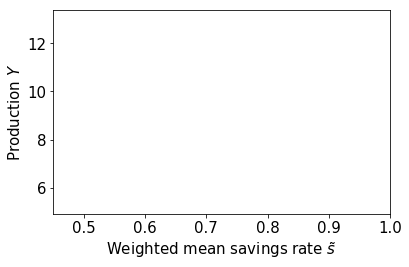

In [32]:
# animate some MAKRO variables

#ax.plot(traj['Y'].values[start:stop], traj['r'].values[start:stop])
import matplotlib.animation as animation
from IPython.display import HTML
plt.rcParams['animation.html'] = 'html5'
import matplotlib.colors as colors

start, stop = 4000, 6000
fig, (ax) = plt.subplots()
ax.set_xlabel(r'Weighted mean savings rate $\tilde{s}$')


ax.set_ylabel(r'Production $Y$')
fig.tight_layout()
#ax.set_prop_cycle(color= [plt.cm.spectral(k) for k in np.linspace(0,1,n_agents)])

# ax2.set_xlabel(r'Savings rate $s_i$')
# ax2.set_xlim((0,1))
# ax2.set_ylim((0,100))

n_points=100
def animate(i):
    for line in lines:
        #line.set_data(S[start+i-n_points:start+i,:].mean(1), traj['Y'].values[start+i-n_points:start+i])
        line.set_data((K[start+i-n_points:start+i,:]*S[start+i-n_points:start+i,:]).sum(1)/\
                      K[start+i-n_points:start+i,:].sum(1),traj['Y'].values[start+i-n_points:start+i])
        line.set_color('k')
        line.set_marker('x')
        line.set_linestyle('-')
            
    return tuple(lines)

def init():
    for a, line in enumerate(lines):
        line.set_data([],[])
        line.set_marker('x')
        line.set_markersize(5)
        line.set_linestyle('--')
        #line.set_markeredgecolor('%s')
        #line.set_color(plt.cm.spectral((a+1) / float(n_agents)))
    
    return lines

lines=[]
lobj = ax.plot([],[],
              color=plt.cm.spectral((k+1.) / n_agents) )[0]
lines.append(lobj)
    
#x = S[start,:n_agents]
#line, = ax.plot(x, K[start,:n_agents])
# ax.set_xlim(( 0, np.max(S[start-n_points:stop,:].mean(1)+0.05)))
# ax.set_ylim((traj['Y'].values[start-n_points:stop].min(), 
#              traj['Y'].values[start-n_points:stop].max()+0.5 ))
ax.set_xlim(( 0.45, 1))
ax.set_ylim((traj['Y'].values[start-n_points:stop].min(), 
             traj['Y'].values[start-n_points:stop].max()+0.5 ))

#ax.set_yscale('log')
#ax.legend([r'$\dot{K}_i=0$'],loc = 'lower right')
ani = animation.FuncAnimation(fig, animate, np.arange(start, stop), init_func=init,
                              interval=50, blit=True)
#HTML(ani.to_html5_video())

/home/yuki/anaconda2/envs/env_full2/lib/python2.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in divide


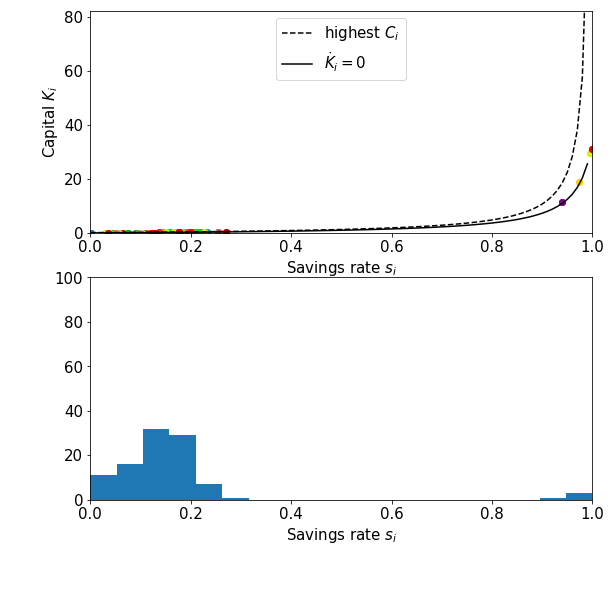

In [46]:
ani.save('eps05_phi05_31500-33500.mp4')

/home/yuki/anaconda2/envs/env_full2/lib/python2.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in divide


/home/yuki/anaconda2/envs/env_full2/lib/python2.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in divide


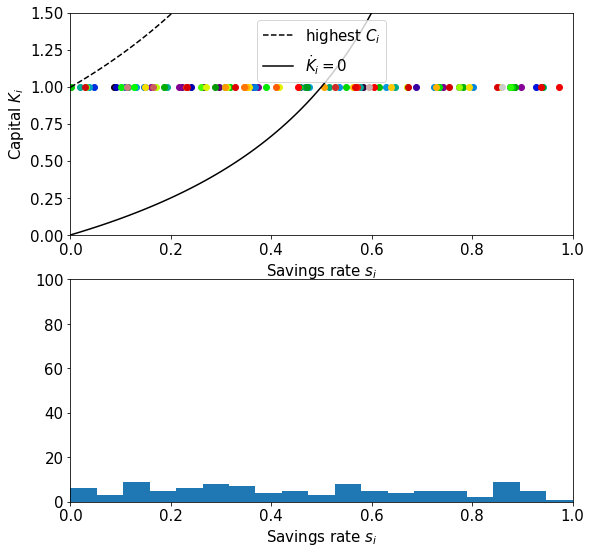

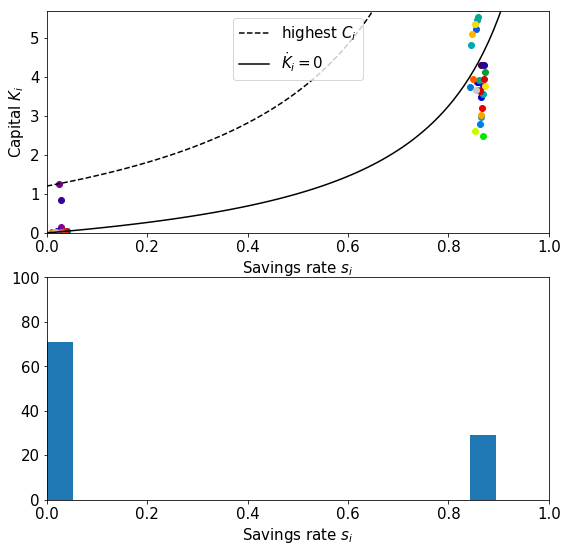

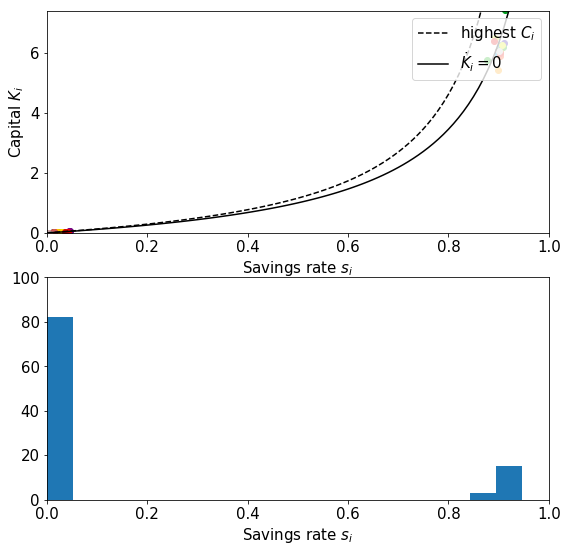

In [76]:
a=[3,1,4]
a[1:2]

[1]

In [ ]:
#### for plotting single households ####

plt.rc('font', size=15)  
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,figsize=(15,10))
plt.suptitle(r'$\delta=%s, \tau=%s$'%(np.round(delta/100.,2),tau))
start, stop = 0,5000#len(traj.index) - 250,len(traj.index) 
print start, stop
kidotzero = W[start:stop,:]/(((delta/100. )/S[start:stop,:]) -traj['r'].values[start:stop][:,None])
kidotzero/=N
kidotzero_low = kidotzero*(kidotzero<L)
kidotzero_high = kidotzero*(kidotzero>=L)

L=0.05


n=4
for a,i in enumerate([3,5,7]):
    ax1.plot(traj.index[start:stop],S[start:stop,i], 
             c=plt.cm.spectral(float(a+1) / n),label='Househ. %s'%i)#, alpha=0.955);
    ax1.set_ylabel(r'Savings rate $s_i$')
    ax2.plot(traj.index[start:stop],K[start:stop,i], 
             c=plt.cm.spectral(float(a+1) / n),label='Househ. %s'%i)#,alpha=0.955);
    ax2.set_ylabel(r'Capital $K_i$')
    ax3.plot(traj.index[start:stop],C[start:stop,i], 
             c=plt.cm.spectral(float(a+1) / n),label='Househ. %s'%i)#,alpha=0.955);
    ax3.set_ylabel(r'Consumption $C_i$')
ax1.legend()
ax3.legend()
ax2.plot(np.array(traj.index[start:stop])[np.nonzero(kidotzero_high)[0]],
     kidotzero_high[np.nonzero(kidotzero_high)],
     'k',lw=3,label=r'$\dot{K}_i=0$');
ax2.plot(np.array(traj.index[start:stop])[np.nonzero(kidotzero_low)[0]],
     kidotzero_low[np.nonzero(kidotzero_low)],
     'k',lw=3,label=r'$\dot{K}_i=0$');
#ax1.plot(traj.index[start:stop],S[start:stop,:].mean(1),label='mean');
#ax1.legend();
#ax1.plot(traj.index[start:stop],S[start:stop,:].mean(1),lael='mean');

from collections import OrderedDict
handles, labels = ax2.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax2.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=2)
ax2.set_yscale('log')
#ax2.set_ylim(0,9)

ax4.plot(traj.index[start:stop],K[start:stop,:].sum(1),c='b');
ax4.set_ylabel('Aggreg. K')

ax5 = ax4.twinx();
ax5.plot(traj.index[start:stop],traj['r'].values[start:stop],c='g');
ax5.plot(traj.index[start:stop],delta/100. +0*traj.index[start:stop],
         'k--',label=r'$\delta$');
ax5.legend(loc='upper right')
ax5.set_ylabel('Interest rate')
ax5.tick_params(axis='y', colors='g')
ax4.tick_params(axis='y', colors='b')
ax4.set_xlabel('timesteps')
fig.savefig('delta_%s_start%s_stop%s_three.pdf'%(delta,start,stop))


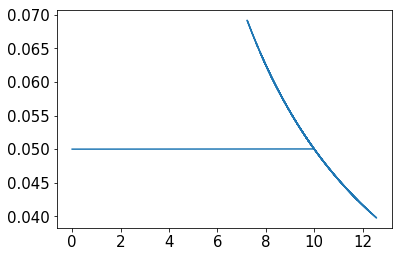

In [ ]:
# try (1-s)exp(s tau)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from matplotlib import colors, ticker
u = np.linspace(0.01, 0.99, 100)
v = np.logspace(0.001, 1., 100)
X, Y = np.meshgrid(u, v)
Z = (1-X)*np.exp(X*Y)


fig2=plt.figure()
ax=fig2.add_subplot(111)
c = ax.contourf(Y, X, Z, zdir='z', norm=colors.LogNorm(),levels=np.logspace(-4,4,18))
ax.plot( 1./(1.-u),u,'k--',label=r'$\tau=\frac{1}{1-s_i}$')
ax.legend()

cb = plt.colorbar(c)
cb.set_ticks(np.logspace(-4,4,9))
cb.set_ticklabels(np.logspace(-4,4,9))
def fmt(x, pos):
    a, b = '{:.0e}'.format(x).split('e')
    b = int(b)
    return r'$ 10^{{{}}}$'.format(b)

cb.formatter = ticker.FuncFormatter(fmt)
cb.update_ticks()

ax.set_xlabel(r'$\tau$')
ax.set_ylabel(r'$s_i$')
ax.set_title(r'$(1-s)e^{s\tau}$')
ax.set_xlim(min(v),max(v))
#fig.savefig('C_hat.pdf')

plt.show()
